<a href="https://colab.research.google.com/github/Dataniel31/Proyecto1-AnalisisDe-Pel-culasySeries-de-TVenIMDB/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Importa librerias necesarias para la solucion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



PASO 1 -> CARGA Y LIMPIEZA DE DATOS

In [58]:
#crear el dataframe
df=pd.read_csv('imdb_top_1000.csv')

print(df.shape)
df.head()



(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [59]:

#Cambiar los encabezados de la tabla a español
df.columns = [
    'Enlace al Póster', 'Título', 'Año de lanzamiento', 'Certificación', 
    'Duración', 'Género', 'Calificación en IMDB', 'Resumen', 
    'Puntuación en Metacritic', 'Director', 'Actor Principal 1', 
    'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4', 
    'Número de votos', 'Recaudación bruta'
]

#Obtener el numero de filas no nulas y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Enlace al Póster          1000 non-null   object 
 1   Título                    1000 non-null   object 
 2   Año de lanzamiento        1000 non-null   object 
 3   Certificación             899 non-null    object 
 4   Duración                  1000 non-null   object 
 5   Género                    1000 non-null   object 
 6   Calificación en IMDB      1000 non-null   float64
 7   Resumen                   1000 non-null   object 
 8   Puntuación en Metacritic  843 non-null    float64
 9   Director                  1000 non-null   object 
 10  Actor Principal 1         1000 non-null   object 
 11  Actor Principal 2         1000 non-null   object 
 12  Actor Principal 3         1000 non-null   object 
 13  Actor Principal 4         1000 non-null   object 
 14  Número de

In [60]:
#Eliminamos todas las filas que contienen algun valor nulo
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Enlace al Póster          714 non-null    object 
 1   Título                    714 non-null    object 
 2   Año de lanzamiento        714 non-null    object 
 3   Certificación             714 non-null    object 
 4   Duración                  714 non-null    object 
 5   Género                    714 non-null    object 
 6   Calificación en IMDB      714 non-null    float64
 7   Resumen                   714 non-null    object 
 8   Puntuación en Metacritic  714 non-null    float64
 9   Director                  714 non-null    object 
 10  Actor Principal 1         714 non-null    object 
 11  Actor Principal 2         714 non-null    object 
 12  Actor Principal 3         714 non-null    object 
 13  Actor Principal 4         714 non-null    object 
 14  Número de votos

ANALIZANDO LAS COLUMNAS Y EL TIPO DE VARIABLE QUE TIENE CADA COLUMNA

SE LLEGA A LA CONCLUSION QUE DEBEMOS CAMBIAR EL TIPO DE VARIABLE DE LAS SIGUIENTES COLUMNAS

Año de lanzamiento ->  int (Los años son enteros)


In [63]:
print(df['Año de lanzamiento'].unique())
registro = df[df['Año de lanzamiento'] == 'PG']
registro


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2019' '2014' '1998' '1997' '1995'
 '1991' '1977' '1954' '2011' '2006' '2000' '1988' '1985' '1968' '1960'
 '1942' '1936' '1931' '2018' '2016' '2017' '2012' '2009' '1981' '1979'
 '1964' '2004' '1992' '1987' '1986' '1984' '1983' '1976' '1973' '1971'
 '1965' '1962' '1959' '1958' '1952' '1944' '1941' '2013' '2007' '2005'
 '1989' '1963' '1950' '1948' '2015' '1996' '1982' '1978' '1967' '1951'
 '1949' '1940' '1939' '1934' '1970' '1969' '1961' '1946' '1930' '1938'
 '1933' 'PG' '1953']


,Enlace al Póster,Título,Año de lanzamiento,Certificación,Duración,Género,Calificación en IMDB,Resumen,Puntuación en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Número de votos,Recaudación bruta
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [66]:
df.loc[df['Año de lanzamiento'] == 'PG', 'Año de lanzamiento'] = '1970'
registro = df[df['Título'] == 'Apollo 13']
registro


,Enlace al Póster,Título,Año de lanzamiento,Certificación,Duración,Género,Calificación en IMDB,Resumen,Puntuación en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Número de votos,Recaudación bruta
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1970,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [67]:
print(df['Año de lanzamiento'].unique())


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2019' '2014' '1998' '1997' '1995'
 '1991' '1977' '1954' '2011' '2006' '2000' '1988' '1985' '1968' '1960'
 '1942' '1936' '1931' '2018' '2016' '2017' '2012' '2009' '1981' '1979'
 '1964' '2004' '1992' '1987' '1986' '1984' '1983' '1976' '1973' '1971'
 '1965' '1962' '1959' '1958' '1952' '1944' '1941' '2013' '2007' '2005'
 '1989' '1963' '1950' '1948' '2015' '1996' '1982' '1978' '1967' '1951'
 '1949' '1940' '1939' '1934' '1970' '1969' '1961' '1946' '1930' '1938'
 '1933' '1953']


In [68]:
df['Año de lanzamiento'] = df['Año de lanzamiento'].astype(int)



Duracion  ->  int ()




In [70]:
print(df['Duración'].unique())
df['Duración'] = df['Duración'].str.replace(' min', '').astype(int)


['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '139 min' '178 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '132 min' '169 min' '130 min' '125 min'
 '189 min' '116 min' '127 min' '118 min' '121 min' '207 min' '122 min'
 '106 min' '112 min' '151 min' '150 min' '155 min' '119 min' '110 min'
 '88 min' '137 min' '165 min' '109 min' '102 min' '87 min' '126 min'
 '117 min' '181 min' '149 min' '105 min' '164 min' '170 min' '98 min'
 '101 min' '113 min' '134 min' '115 min' '147 min' '95 min' '123 min'
 '131 min' '153 min' '108 min' '104 min' '89 min' '81 min' '99 min'
 '160 min' '114 min' '129 min' '228 min' '128 min' '103 min' '107 min'
 '140 min' '138 min' '180 min' '158 min' '156 min' '135 min' '86 min'
 '162 min' '91 min' '172 min' '145 min' '93 min' '120 min' '80 min'
 '111 min' '100 min' '141 min' '92 min' '224 min' '188 min' '94 min'
 '183 min' '212 min' '238 min' '144 min' '143 min' '186 min' '83 min'
 '76 min' '90 min' '8

In [71]:
print(df['Duración'].unique())

[142 175 152 202  96 201 154 195 148 139 178 161 179 136 146 124 133 132
 169 130 125 189 116 127 118 121 207 122 106 112 151 150 155 119 110  88
 137 165 109 102  87 126 117 181 149 105 164 170  98 101 113 134 115 147
  95 123 131 153 108 104  89  81  99 160 114 129 228 128 103 107 140 138
 180 158 156 135  86 162  91 172 145  93 120  80 111 100 141  92 224 188
  94 183 212 238 144 143 186  83  76  90  84 191 197 174 209  97  82  85
 168 157 166 192 194 159 193  72 163  78]


Recaudacion -> float (Representa dinero)

In [73]:
print(df['Recaudación bruta'].unique())
df['Recaudación bruta'] = pd.to_numeric(df['Recaudación bruta'].str.replace(',', ''), errors='coerce')

['28,341,469' '134,966,411' '534,858,444' '57,300,000' '4,360,000'
 '377,845,905' '107,928,762' '96,898,818' '292,576,195' '37,030,102'
 '315,544,750' '330,252,182' '6,100,000' '342,551,365' '171,479,930'
 '46,836,394' '290,475,067' '112,000,000' '53,367,844' '188,020,017'
 '7,563,397' '10,055,859' '216,540,909' '136,801,374' '57,598,247'
 '100,125,643' '130,742,922' '322,740,140' '269,061' '335,451,311'
 '13,092,000' '13,182,281' '53,089,891' '132,384,315' '32,572,577'
 '187,705,427' '6,719,864' '23,341,568' '19,501,238' '422,783,777'
 '204,843,350' '11,990,401' '210,609,762' '5,321,508' '32,000,000'
 '1,024,560' '163,245' '19,181' '1,661,096' '5,017,246' '190,241,310'
 '858,373,000' '678,815,482' '209,726,015' '162,805,434' '448,139,099'
 '6,532,908' '223,808,164' '11,286,112' '707,481' '25,544,867' '2,375,308'
 '248,159,971' '44,017,374' '83,471,511' '78,900,000' '275,902'
 '36,764,313' '159,227,644' '687,185' '7,098,492' '6,857,096'
 '120,540,719' '34,400,301' '33,225,499' '30,328,

In [74]:
print(df['Recaudación bruta'].unique())


[ 28341469 134966411 534858444  57300000   4360000 377845905 107928762
  96898818 292576195  37030102 315544750 330252182   6100000 342551365
 171479930  46836394 290475067 112000000  53367844 188020017   7563397
  10055859 216540909 136801374  57598247 100125643 130742922 322740140
    269061 335451311  13092000  13182281  53089891 132384315  32572577
 187705427   6719864  23341568  19501238 422783777 204843350  11990401
 210609762   5321508  32000000   1024560    163245     19181   1661096
   5017246 190241310 858373000 678815482 209726015 162805434 448139099
   6532908 223808164  11286112    707481  25544867   2375308 248159971
  44017374  83471511  78900000    275902  36764313 159227644    687185
   7098492   6857096 120540719  34400301  33225499  30328156   3635482
 130096601 138433435    933933 191796233  75600000   2832029  46357676
  85160248  51973029  45598982 309125409  11487676  28262574 159600000
   6207725  56954992  15000000  44824144  18600000  13275000   3200000
   881

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Enlace al Póster          714 non-null    object 
 1   Título                    714 non-null    object 
 2   Año de lanzamiento        714 non-null    int64  
 3   Certificación             714 non-null    object 
 4   Duración                  714 non-null    int64  
 5   Género                    714 non-null    object 
 6   Calificación en IMDB      714 non-null    float64
 7   Resumen                   714 non-null    object 
 8   Puntuación en Metacritic  714 non-null    float64
 9   Director                  714 non-null    object 
 10  Actor Principal 1         714 non-null    object 
 11  Actor Principal 2         714 non-null    object 
 12  Actor Principal 3         714 non-null    object 
 13  Actor Principal 4         714 non-null    object 
 14  Número de votos

ANALISIS EDA

In [80]:
print(df.describe())

       Año de lanzamiento    Duración  Calificación en IMDB  \
count          714.000000  714.000000            714.000000   
mean          1995.700280  123.715686              7.937115   
std             18.610116   25.887535              0.293278   
min           1930.000000   72.000000              7.600000   
25%           1986.250000  104.250000              7.700000   
50%           2001.000000  120.000000              7.900000   
75%           2009.750000  136.000000              8.100000   
max           2019.000000  238.000000              9.300000   

       Puntuación en Metacritic  Número de votos  Recaudación bruta  
count                714.000000     7.140000e+02       7.140000e+02  
mean                  77.158263     3.561348e+05       7.851359e+07  
std                   12.401144     3.539011e+05       1.149780e+08  
min                   28.000000     2.522900e+04       1.305000e+03  
25%                   70.000000     9.600975e+04       6.157408e+06  
50%         

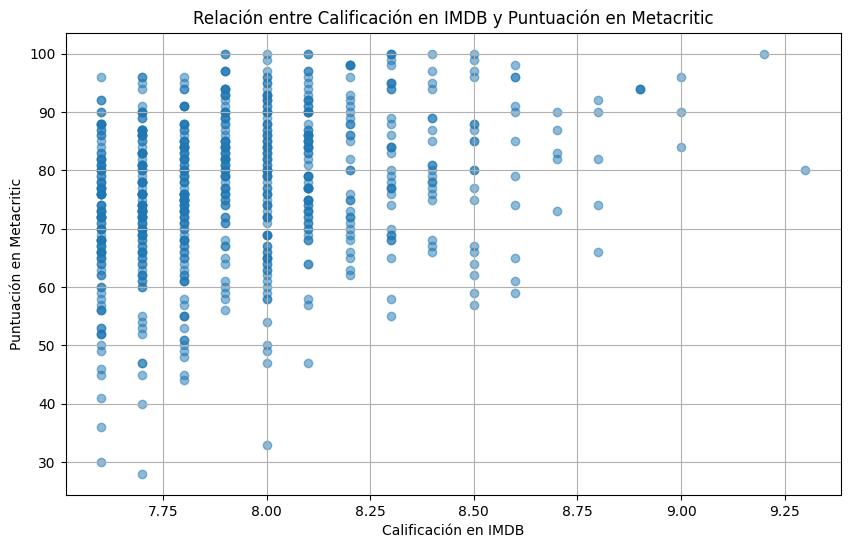

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Calificación en IMDB'], df['Puntuación en Metacritic'], alpha=0.5)
plt.title('Relación entre Calificación en IMDB y Puntuación en Metacritic')
plt.xlabel('Calificación en IMDB')
plt.ylabel('Puntuación en Metacritic')
plt.grid(True)
plt.show()

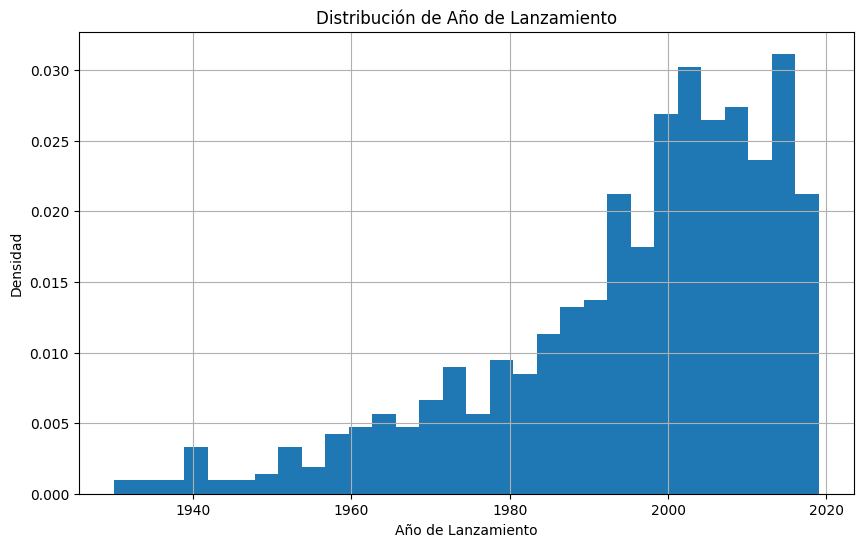

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['Año de lanzamiento'], bins=30, density=True)
plt.title('Distribución de Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


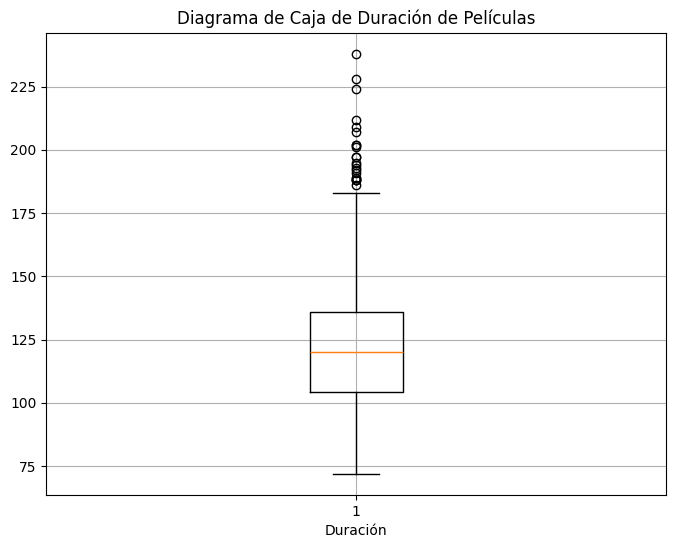

In [84]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Duración'])
plt.title('Diagrama de Caja de Duración de Películas')
plt.xlabel('Duración')
plt.grid(True)
plt.show()

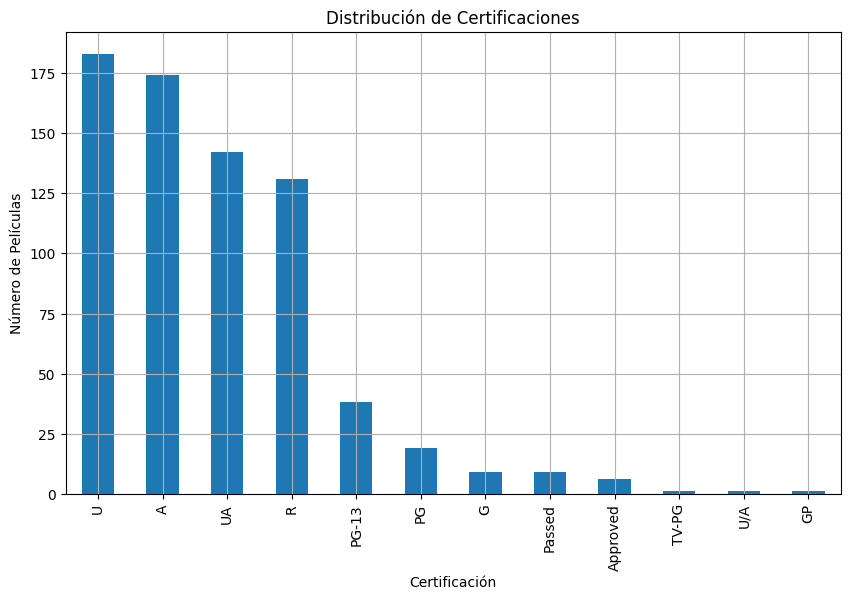

In [85]:
plt.figure(figsize=(10, 6))
df['Certificación'].value_counts().plot(kind='bar')
plt.title('Distribución de Certificaciones')
plt.xlabel('Certificación')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()
